# Data
in this project we are using US flight data of 2008. The data is available http://stat-computing.org/dataexpo/2009/the-data.html along with data dictionary. 

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('C:/Users/ameimand/Documents/Thinkful/Codes/Data/2008.csv')
df['Season']=np.where(df['Month'] <= 6, '1', '2')
df_top_airport=df[(df['Origin'] == 'ATL')|(df['Origin'] == 'ORD')|(df['Origin'] == 'DFW')]
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Season
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1


# Correlation 
Create the scatter plot for Distance vs Time to see if there is any correlation.

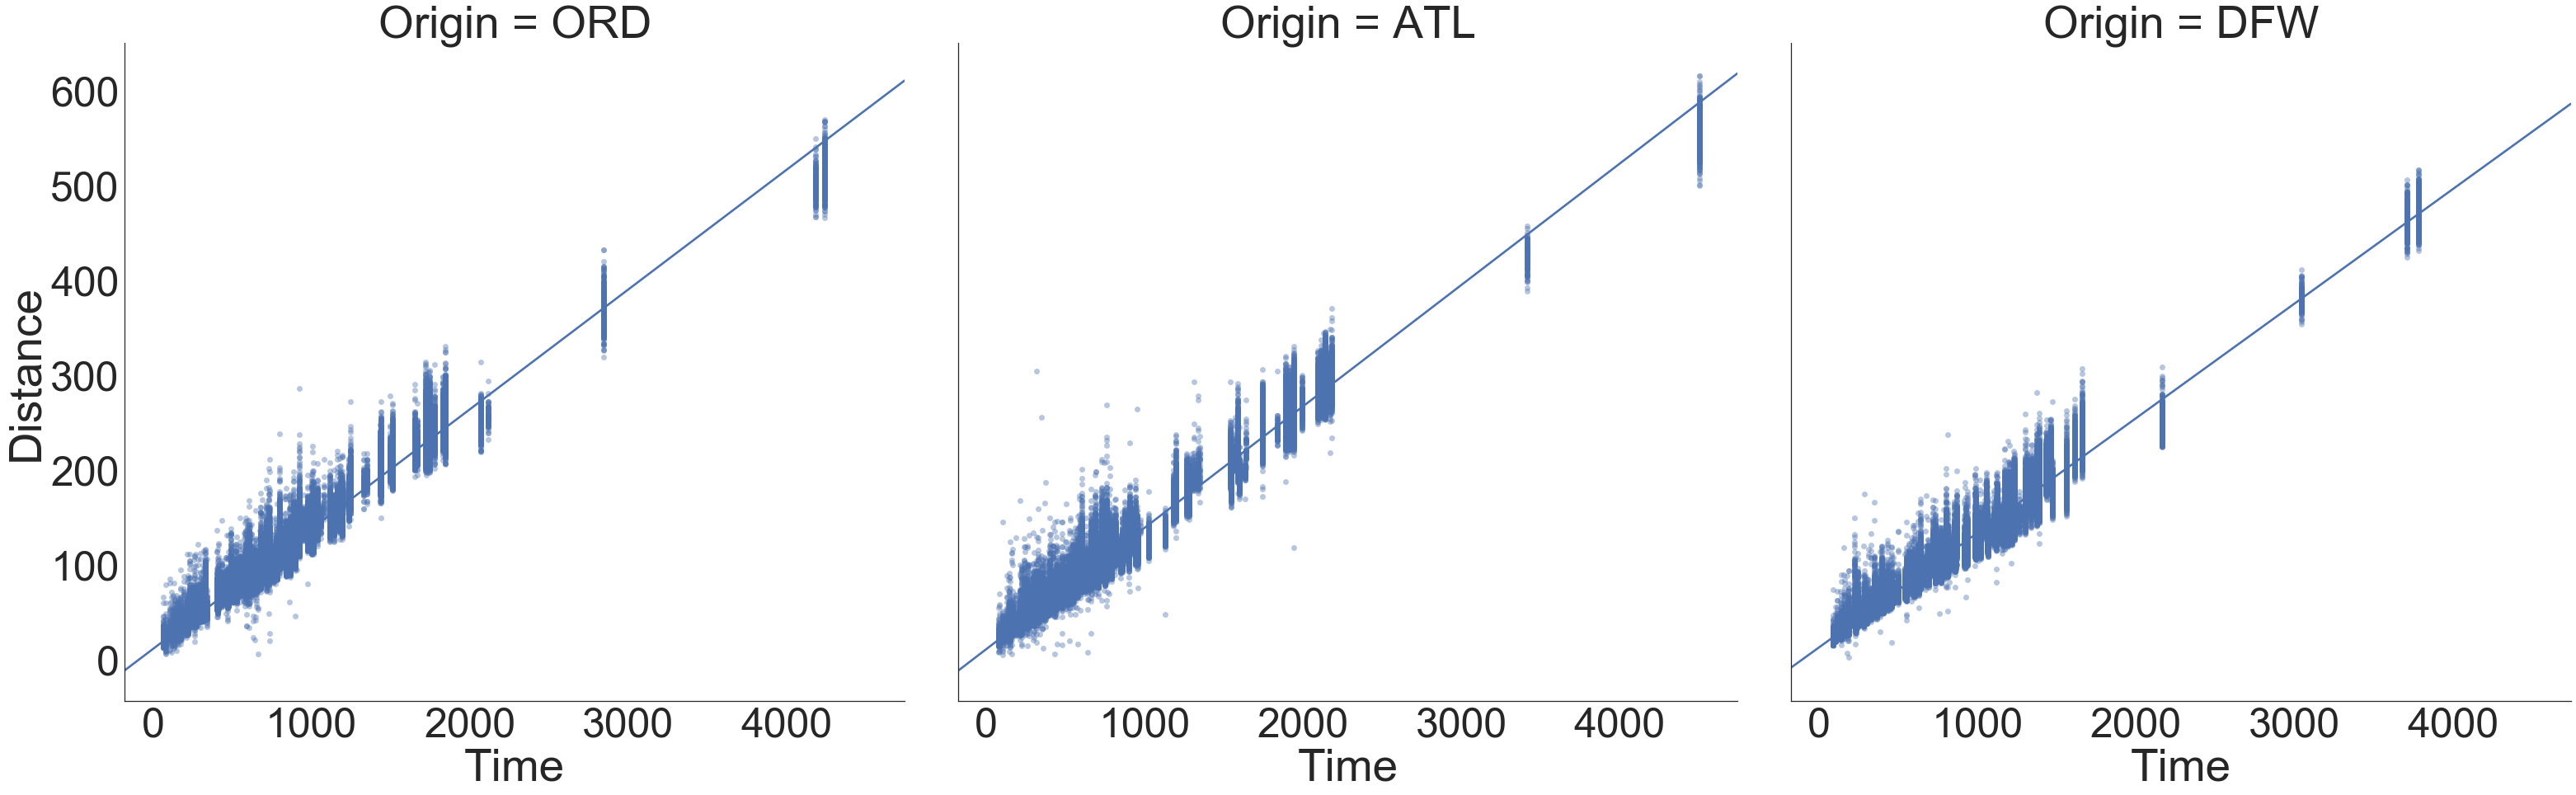

In [96]:
sns.set(style="white",font_scale=5)

g = sns.lmplot(y='AirTime', # Variable 1.
               x='Distance', # Variable 2.
               data=df_top_airport, # Data
               size = 15,
               col='Origin',               
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Distance")
g.set_xlabels("Time")
#plt.title('Scatterplot: Distance vs Time')
plt.show()



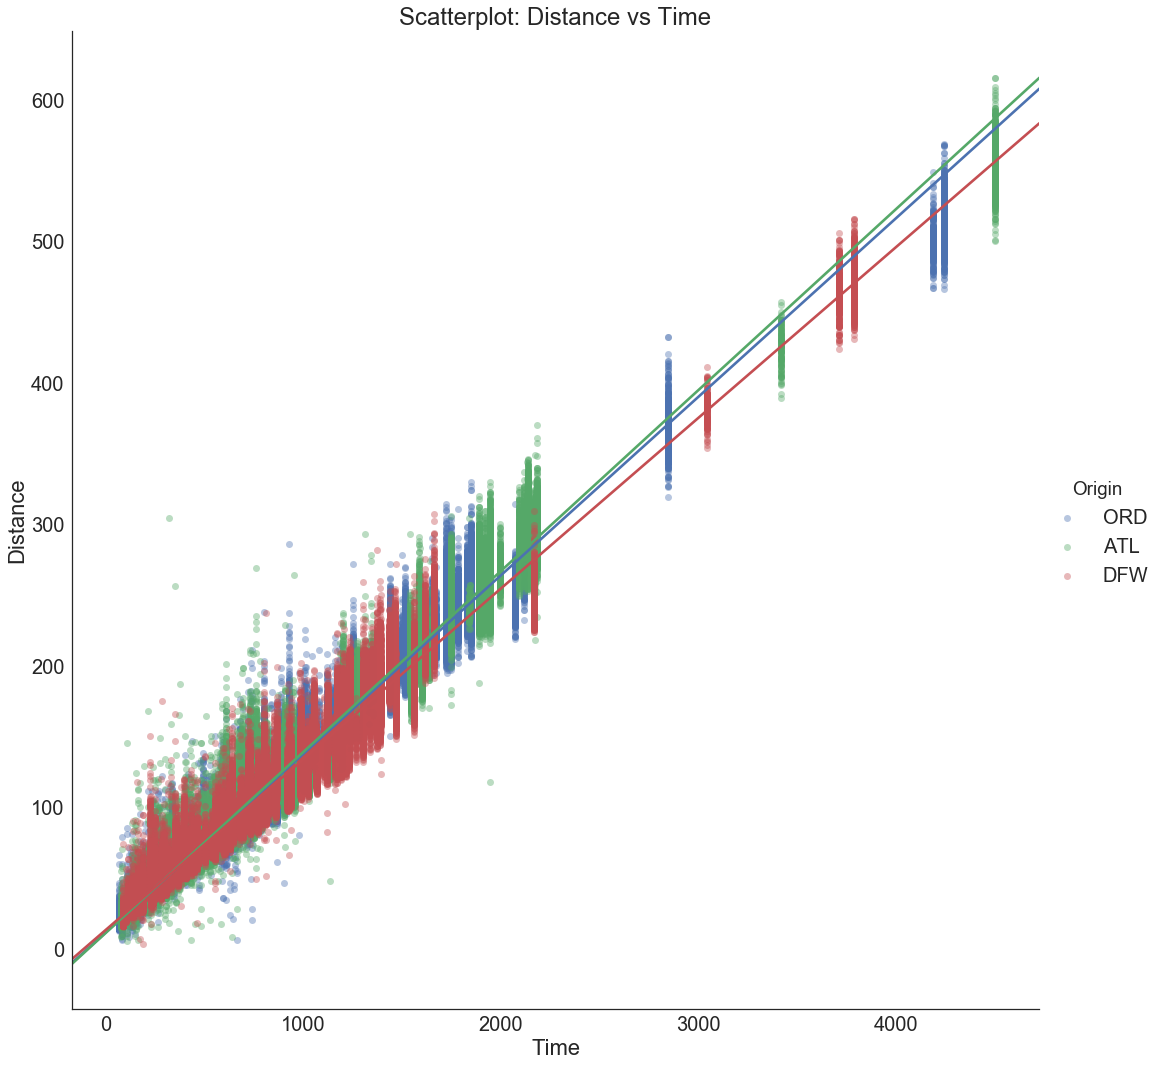

In [97]:
sns.set(style="white",font_scale=2)
g = sns.lmplot(y='AirTime', # Variable 1.
               x='Distance', # Variable 2.
               data=df_top_airport, # Data
               hue='Origin',
               size = 15, #Height (in inches) of each facet
               fit_reg=True, # If set to true, plots a regression line.
               #logistic = True,
               #logx = True,
               #order = n #polynomial
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Distance")
g.set_xlabels("Time")
plt.title('Scatterplot: Distance vs Time')
plt.show()



# Airport Comparison
In this part we are interested in using boxplot to be able to compare the delay time of four major airport

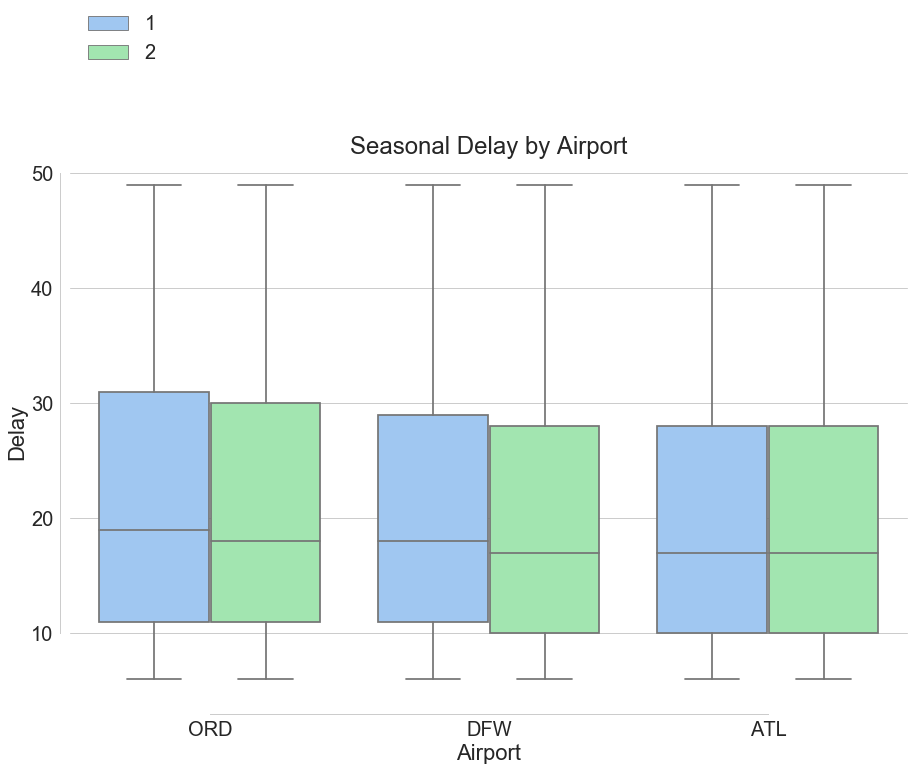

In [99]:
df_trim=df_top_airport[(df_top_airport['DepDelay'] < 50) & (df_top_airport['DepDelay'] > 5)]


sns.set(style="whitegrid",font_scale=2)
plt.figure(figsize=(15, 10))


ax = sns.boxplot(x='Origin',y='DepDelay',hue='Season',data=df_trim,palette='pastel')  


plt.title('Seasonal Delay by Airport')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Airport', ylabel='Delay')
ax.legend(loc='upper left',bbox_to_anchor=(0, 1.3))

plt.show()
